In [43]:
import pandas as pd


In [44]:
df=pd.read_csv("/content/delivery_time.csv");
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [48]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [49]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<ipython-input-50-1a9f210b06e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

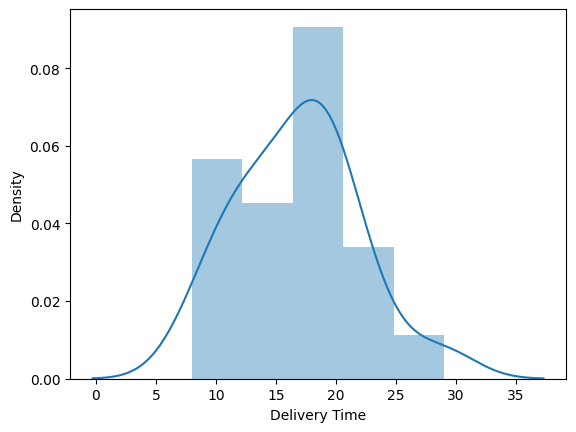

In [50]:
import seaborn as sns
sns.distplot(df['Delivery Time'])

<ipython-input-51-7b95df57ee4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

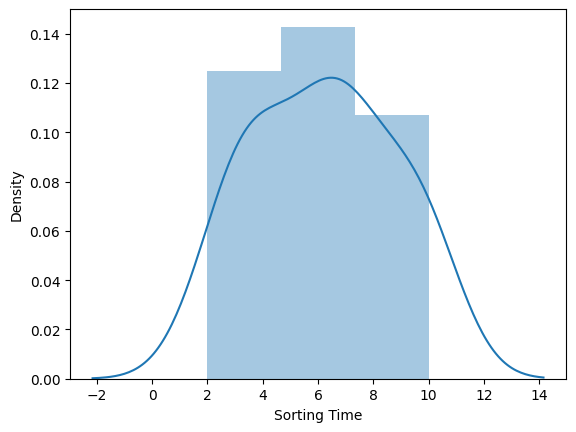

In [51]:
sns.distplot(df['Sorting Time'])

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

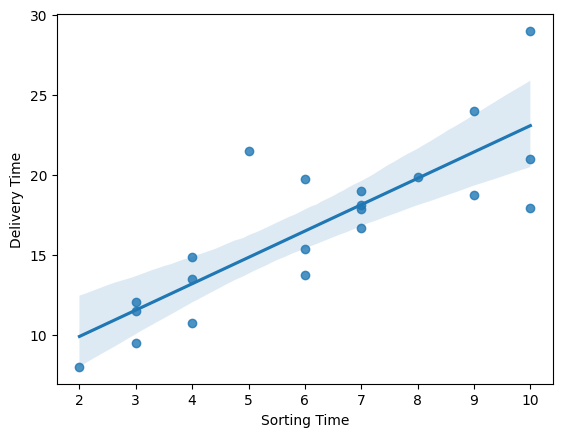

In [52]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=df)

In [53]:
df=df.rename({'Delivery Time':'deliver_time','Sorting Time':'sorting_time'},axis=1)
df

,deliver_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [55]:
import statsmodels.formula.api as smf
model=smf.ols("deliver_time~sorting_time",data=df).fit()

In [57]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [58]:
6.582734+1.649020*10

23.072933999999997

In [59]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [60]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [61]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [65]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [66]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64